In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.regions import *
from src.pcs import *
from src.plotting import *

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_55337/1802522474.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_pr = pr.groupby(pd.cut(size, area_bins)).mean()  # Mean precipitation for each area bin
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_55337/1802522474.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_pr = pr.groupby(pd.cut(size, area_bins)).mean()  # Mean precipitation for each area bin
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_55337/1802522474.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

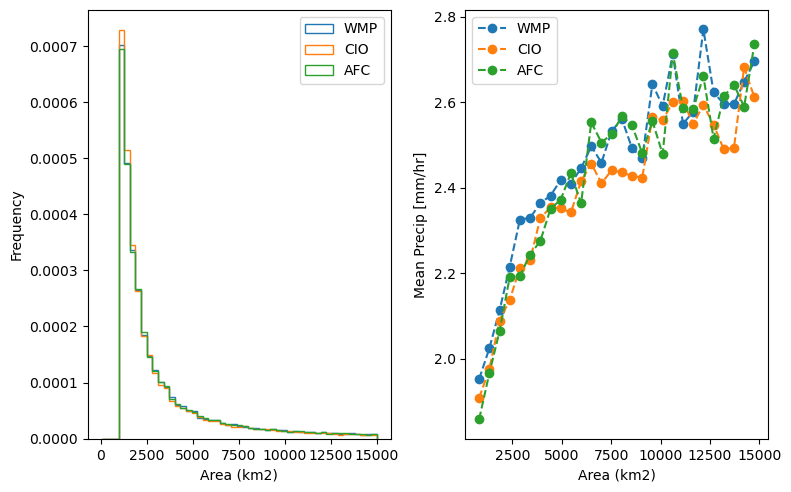

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(8,5))
for region in [wmp_region(), cio_region(), afc_region()]:
    df = load_pf_stats(region.name)
    
    # Plot size
    ax = axs[0]
    size_bins = np.linspace(40, 15_000)
    size = (df.num_pixels*25)
    size.plot.hist(ax=ax, bins=size_bins, histtype='step', label=region.name, density=True)
    ax.legend()
    ax.set_xlabel('Area (km2)')
    ax.set_ylabel('Frequency')
    # Plot precip
    pr = (df.total_precip/df.num_pixels)
    area_bins = np.linspace(40, 15_000, 30)  # Define bins for area
    binned_pr = pr.groupby(pd.cut(size, area_bins)).mean()  # Mean precipitation for each area bin
    
    # Calculate bin centers for plotting
    bin_centers = (area_bins[:-1] + area_bins[1:]) / 2
    
    # Plot the bin-mean precipitation
    ax = axs[1]
    ax.plot(bin_centers, binned_pr, marker='o', linestyle='--', label=f'{region.name}')

    ax.legend()
    ax.set_xlabel('Area (km2)')
    ax.set_ylabel('Mean Precip [mm/hr]')

fig.tight_layout(pad=1)

# How do these structures depend on large-scale propoerties?

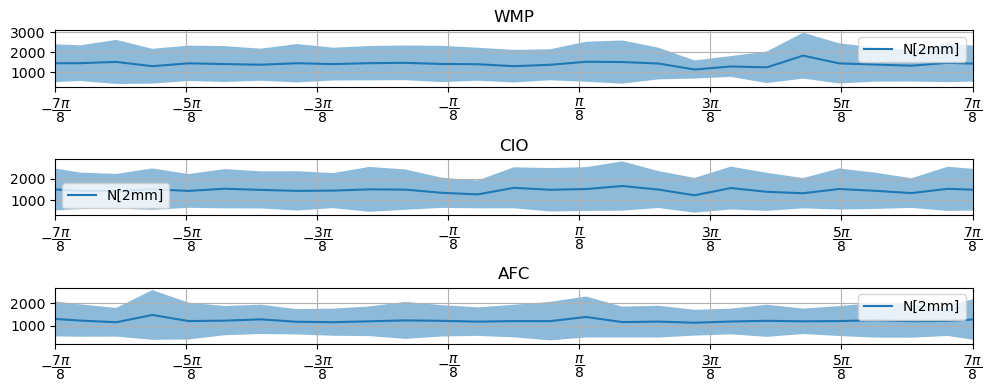

In [57]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,4))
regions = [wmp_region(), cio_region(), afc_region()]
for i, region in enumerate(regions):
   
    df = load_pf_pc_database(region.name, 2)
    df = df[(df['num_pixels']>df['num_pixels'].quantile(0.9))]
    alpha_c = df.pc1/load_era5_pcs(region.name).sel(mode=1).std().item()
    alpha_s = df.pc2/load_era5_pcs(region.name).sel(mode=2).std().item()
    theta = np.arctan2(alpha_s, alpha_c)
    theta_bins = np.linspace(-np.pi, np.pi, 30)

    data_to_bin = df.num_pixels
    binned_data = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).mean()
    upper = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).std()#(0.75)
    lower = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).std()#.quantile(0.25)
    bin_centers = (theta_bins[:-1] + theta_bins[1:])/2
    
    ax = axs[np.unravel_index(i, axs.shape)]
    ax.plot(bin_centers, binned_data, label='N[2mm]')
    ax.fill_between(bin_centers, binned_data-lower, binned_data+upper, alpha=0.5)

    ax.set_title(region.name)
    ax.legend()


    # Set x-axis ticks and labels
    tick_positions = np.arange(-7*np.pi/8, 7*np.pi/8 + np.pi/8, np.pi/4)
    tick_labels = [r'$-\dfrac{7\pi}{8}$',
                r'$-\dfrac{5\pi}{8}$',
                r'$-\dfrac{3\pi}{8}$',
                r'$-\dfrac{\pi}{8}$',
                r'$\dfrac{\pi}{8}$',
                r'$\dfrac{3\pi}{8}$',
                r'$\dfrac{5\pi}{8}$',
                r'$\dfrac{7\pi}{8}$']
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_xlim(-7*np.pi/8, 7*np.pi/8)
    ax.grid()


fig.tight_layout(pad=1)

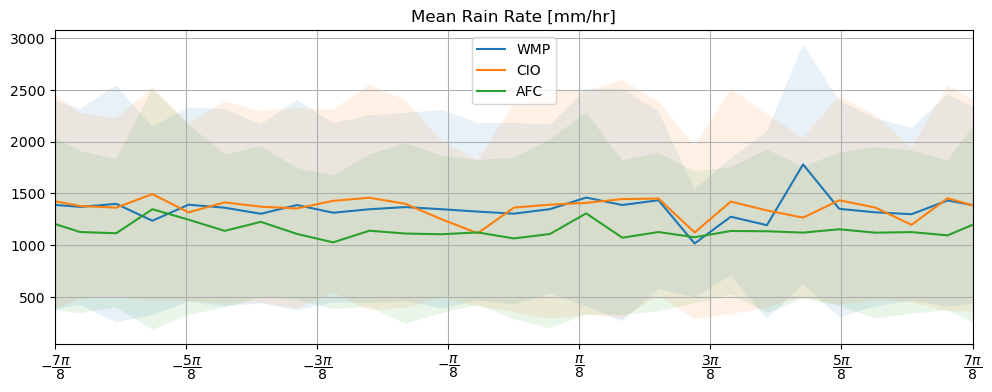

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
regions = [wmp_region(), cio_region(), afc_region()]
for i, region in enumerate(regions):
   
    df = load_pf_pc_database(region.name, 2)
    df = df[(df['total_precip']>df['total_precip'].quantile(0.90))]
    alpha_c = df.pc1/load_era5_pcs(region.name).sel(mode=1).std().item()
    alpha_s = df.pc2/load_era5_pcs(region.name).sel(mode=2).std().item()
    theta = np.arctan2(alpha_s, alpha_c)
    theta_bins = np.linspace(-np.pi, np.pi, 30)

    data_to_bin = df.num_pixels
    binned_data = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).mean()
    upper = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).std()#(0.75)
    lower = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).std()#.quantile(0.25)
    bin_centers = (theta_bins[:-1] + theta_bins[1:])/2
    
    ax.plot(bin_centers, binned_data, label=region.name)
    ax.fill_between(bin_centers, binned_data-lower, binned_data+upper, alpha=0.1)

    ax.set_title('Mean Rain Rate [mm/hr]')
    ax.legend()


    # Set x-axis ticks and labels
    tick_positions = np.arange(-7*np.pi/8, 7*np.pi/8 + np.pi/8, np.pi/4)
    tick_labels = [r'$-\dfrac{7\pi}{8}$',
                r'$-\dfrac{5\pi}{8}$',
                r'$-\dfrac{3\pi}{8}$',
                r'$-\dfrac{\pi}{8}$',
                r'$\dfrac{\pi}{8}$',
                r'$\dfrac{3\pi}{8}$',
                r'$\dfrac{5\pi}{8}$',
                r'$\dfrac{7\pi}{8}$']
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_xlim(-7*np.pi/8, 7*np.pi/8)
    ax.grid()

fig.tight_layout(pad=1)


In [ ]:
df.num_5mmhr_pixels

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_55337/1094602952.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['crh_bin', 'theta_bin'])['data_to_bin'].mean().reset_index()
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_55337/1094602952.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['crh_bin', 'theta_bin'])['data_to_bin'].mean().reset_index()
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_55337/1094602952.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

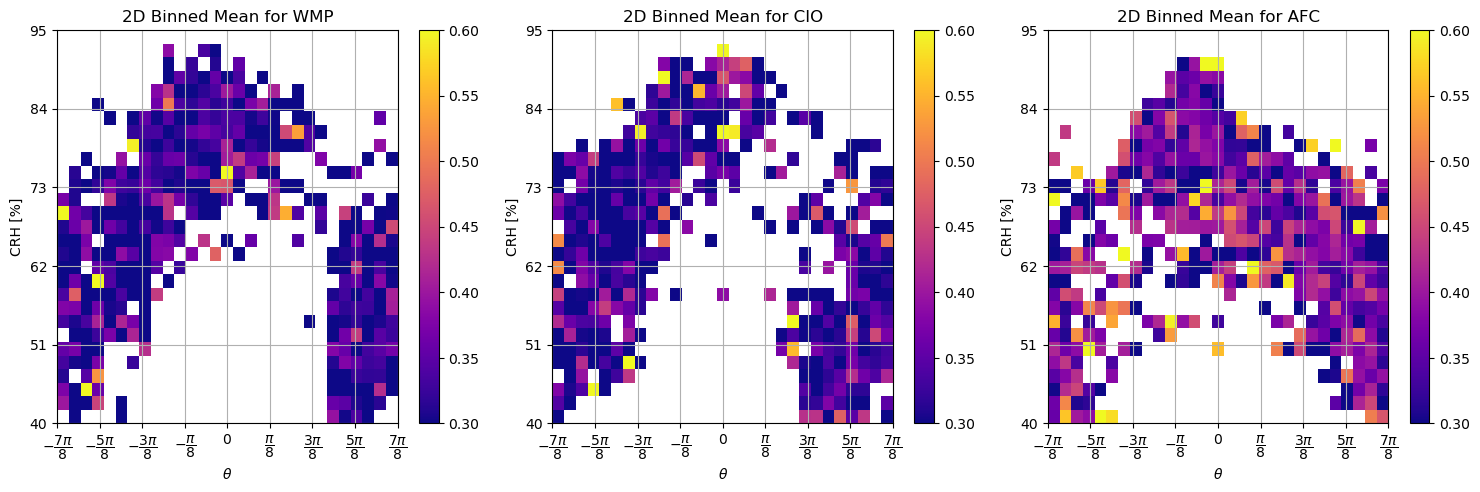

In [54]:
# Define your regions
regions = [wmp_region(), cio_region(), afc_region()]

# Create subplots for each region
fig, axs = plt.subplots(nrows=1, ncols=len(regions), figsize=(15, 5))

for i, region in enumerate(regions):
    # Load data
    df = load_pf_pc_database(region.name, 2)
    crh = load_pf_crh(region.name, 2).crh
    # top 10% size storms
    df = df[df['num_pixels'] > df['num_pixels'].quantile(0.9)]

    # Calculate theta
    alpha_c = df.pc1 / load_era5_pcs(region.name).sel(mode=1).std().item()
    alpha_s = df.pc2 / load_era5_pcs(region.name).sel(mode=2).std().item()
    df['theta'] = np.arctan2(alpha_s, alpha_c)
    df['crh'] = crh  # Ensure 'crh' is in the DataFrame

    # Define bins for theta and crh
    theta_bins = np.linspace(-np.pi, np.pi, 30)
    crh_bins = np.linspace(40, 95, 30)

    # Bin data for theta and crh
    df['theta_bin'] = pd.cut(df['theta'], bins=theta_bins)
    df['crh_bin'] = pd.cut(df['crh'], bins=crh_bins)
    # Group by both binned theta and crh and calculate mean of 'total_precip'
    df['data_to_bin'] = df['max_5mmhr_size']/df['num_5mmhr_pixels']
    grouped = df.groupby(['crh_bin', 'theta_bin'])['data_to_bin'].mean().reset_index()

    # Pivot the table to get a 2D array
    pivot_table = grouped.pivot(index='crh_bin', columns='theta_bin', values='data_to_bin')

    # Ensure all bins are represented in the pivot table
    theta_bin_labels = pd.cut(df['theta'], bins=theta_bins).cat.categories
    crh_bin_labels = pd.cut(df['crh'], bins=crh_bins).cat.categories
    pivot_table = pivot_table.reindex(index=crh_bin_labels, columns=theta_bin_labels)

    # Convert bin intervals to bin edges for plotting
    theta_bin_edges = theta_bins
    crh_bin_edges = crh_bins

    # Create meshgrid for plotting
    X, Y = np.meshgrid(theta_bin_edges, crh_bin_edges)
    Z = pivot_table.values

    # Mask NaN values
    Z = np.ma.masked_invalid(Z)

    # Plot the 2D binned mean using pcolormesh
    ax = axs[i]
    cmap = plt.cm.plasma
    norm = colors.Normalize(vmin=0.3, vmax=0.6)
    pcm = ax.pcolormesh(X, Y, Z, cmap=cmap, norm=norm)

    # Add colorbar
    fig.colorbar(pcm, ax=ax)

    # Set labels and title
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel('CRH [%]')
    ax.set_title(f'2D Binned Mean for {region.name}')

    # Set x-axis ticks and labels
    tick_positions = np.arange(-np.pi, np.pi + np.pi/8, np.pi/4)
    tick_labels = [r'$-\dfrac{7\pi}{8}$',
                   r'$-\dfrac{5\pi}{8}$',
                   r'$-\dfrac{3\pi}{8}$',
                   r'$-\dfrac{\pi}{8}$',
                   r'$0$',
                   r'$\dfrac{\pi}{8}$',
                   r'$\dfrac{3\pi}{8}$',
                   r'$\dfrac{5\pi}{8}$',
                   r'$\dfrac{7\pi}{8}$']
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_xlim(-np.pi, np.pi)

    # Optional: Set y-axis ticks (CRH)
    crh_tick_positions = np.linspace(40, 95, 6)
    ax.set_yticks(crh_tick_positions)
    ax.set_ylim(40, 95)

    # Add grid
    ax.grid()

# Adjust layout
fig.tight_layout(pad=1)
plt.show()


In [33]:
df

,Unnamed: 0,pf_filename,observation_time,mean_latitude,mean_longitude,precipitation_centroid_latitude,precipitation_centroid_longitude,num_pixels,num_conv_pixels,num_strat_pixels,...,max_2mmhr_size,num_5mmhr_pixels,max_5mmhr_size,num_10mmhr_pixels,max_10mmhr_size,total_precip,total_conv_precip,total_strat_precip,max_precip,crh
6,38,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150831_00:52:49,3.562074,176.914078,4.414075,176.843985,3669.0,458.0,3184.0,...,288.0,281.0,61.0,105.0,12.0,7296.258346,2673.917527,4617.702347,73.698845,67.410754
10,45,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150807_00:45:33,7.073743,109.273865,6.979424,109.265485,895.0,355.0,518.0,...,96.0,188.0,38.0,97.0,25.0,4019.757551,3292.627070,723.149492,148.137985,57.788043
13,51,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150811_18:54:47,6.105216,176.007217,6.222321,176.138626,901.0,161.0,722.0,...,55.0,82.0,14.0,39.0,7.0,2038.602198,884.369706,1151.177361,62.265236,60.425979
18,72,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150829_15:42:17,-4.310704,140.571335,-4.321784,140.591518,682.0,141.0,528.0,...,257.0,169.0,70.0,89.0,22.0,2991.973543,853.227853,2136.010105,52.985664,69.494383
23,80,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150807_00:43:35,-3.253770,105.438034,-3.128385,105.528950,305.0,84.0,219.0,...,101.0,86.0,60.0,47.0,21.0,2200.997551,1405.153157,795.560206,168.809723,50.838720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62007,2105,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_21...,20201210_05:16:43,7.962153,117.206993,8.130503,117.501744,901.0,113.0,776.0,...,103.0,84.0,22.0,38.0,10.0,2627.258024,1162.399702,1462.534089,299.429749,44.298313
62035,2133,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_23...,20201211_01:14:31,2.634991,170.254288,2.875958,170.563724,1659.0,350.0,1288.0,...,48.0,163.0,22.0,74.0,9.0,5106.246738,2236.890035,2865.111179,183.442703,78.538968
62056,2154,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_24...,20201230_08:58:33,6.206414,148.326965,4.398609,148.843205,4802.0,365.0,4209.0,...,120.0,264.0,44.0,113.0,26.0,7694.432828,3644.055133,4009.275264,141.771027,63.235271
62057,2155,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_25...,20201211_01:14:31,5.616469,172.125778,5.319387,172.144980,677.0,147.0,528.0,...,53.0,81.0,22.0,53.0,15.0,2783.955422,1804.305388,979.344145,111.013725,72.125329


In [160]:
df

,Unnamed: 0,pf_filename,observation_time,mean_latitude,mean_longitude,precipitation_centroid_latitude,precipitation_centroid_longitude,num_pixels,num_conv_pixels,num_strat_pixels,...,max_2mmhr_size,num_5mmhr_pixels,max_5mmhr_size,num_10mmhr_pixels,max_10mmhr_size,total_precip,total_conv_precip,total_strat_precip,max_precip,crh
6,38,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150831_00:52:49,3.562074,176.914078,4.414075,176.843985,3669.0,458.0,3184.0,...,288.0,281.0,61.0,105.0,12.0,7296.258346,2673.917527,4617.702347,73.698845,80.923359
9,44,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150806_11:35:39,6.545885,123.394447,6.645171,123.399866,243.0,136.0,106.0,...,50.0,45.0,14.0,20.0,5.0,857.730720,660.002607,197.578815,46.675209,73.862733
10,45,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150807_00:45:33,7.073743,109.273865,6.979424,109.265485,895.0,355.0,518.0,...,96.0,188.0,38.0,97.0,25.0,4019.757551,3292.627070,723.149492,148.137985,73.159816
13,51,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150811_18:54:47,6.105216,176.007217,6.222321,176.138626,901.0,161.0,722.0,...,55.0,82.0,14.0,39.0,7.0,2038.602198,884.369706,1151.177361,62.265236,64.498393
16,64,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150825_19:09:23,2.526540,108.490158,2.613412,108.527725,422.0,152.0,251.0,...,49.0,65.0,18.0,21.0,7.0,1329.811310,964.711312,361.461574,75.391777,72.395897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62056,2154,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_24...,20201230_08:58:33,6.206414,148.326965,4.398609,148.843205,4802.0,365.0,4209.0,...,120.0,264.0,44.0,113.0,26.0,7694.432828,3644.055133,4009.275264,141.771027,76.411220
62057,2155,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_25...,20201211_01:14:31,5.616469,172.125778,5.319387,172.144980,677.0,147.0,528.0,...,53.0,81.0,22.0,53.0,15.0,2783.955422,1804.305388,979.344145,111.013725,74.474298
62064,2162,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_25...,20201215_14:06:34,4.673636,137.298965,4.645083,137.371540,385.0,129.0,249.0,...,96.0,68.0,22.0,39.0,9.0,1517.404262,1128.893076,387.029953,67.740372,85.079566
62067,2165,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_26...,20201213_14:17:53,6.355674,141.307449,6.231723,141.310716,423.0,189.0,232.0,...,48.0,59.0,16.0,23.0,6.0,1202.886903,845.804260,356.759994,60.199909,77.558871


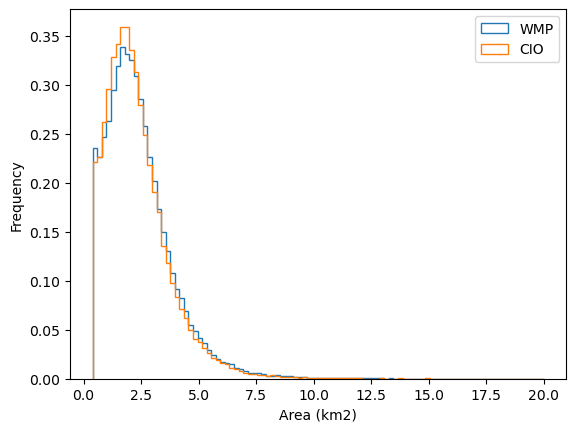

In [146]:
for region in [wmp_region(), cio_region()]:
    df = load_pf_stats(region.name)
    size = (df.total_precip/df.num_pixels)
    size.plot.hist(bins=np.linspace(0.4, 20, 100), histtype='step', label=region.name, density=True)
    plt.legend()
    plt.xlabel('Area (km2)')

<xarray.Dataset> Size: 6GB
Dimensions:    (time: 2192, bnds: 2, lon: 1440, lat: 480)
Coordinates:
  * time       (time) datetime64[ns] 18kB 2015-01-01 2015-01-02 ... 2020-12-31
  * lon        (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat        (lat) float32 2kB -59.88 -59.62 -59.38 ... 59.38 59.62 59.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 35kB ...
    lon_bnds   (lon, bnds) float32 12kB ...
    lat_bnds   (lat, bnds) float32 4kB ...
    cmorph     (time, lat, lon) float32 6GB ...
Attributes: (12/59)
    CDI:                        Climate Data Interface version 2.4.4 (https:/...
    Conventions:                CF-1.6, ACDD-1.3
    source:                     Passive Microwave (PMW) Level 2 precipitation...
    institution:                DOC/NOAA/NWS/NCEP/CPC > Climate Prediction Ce...
    ncei_template_version:      NCEI_NetCDF_Grid_template_V2.0
    title:                      NOAA Climate Data Record (CDR) of CPC Morphin...
    ...                         ...
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_resolution:  0.25
    geospatial_lon_units:       degrees_east
    CDO:                        Climate Data Operators version 2.4.4 (https:/...

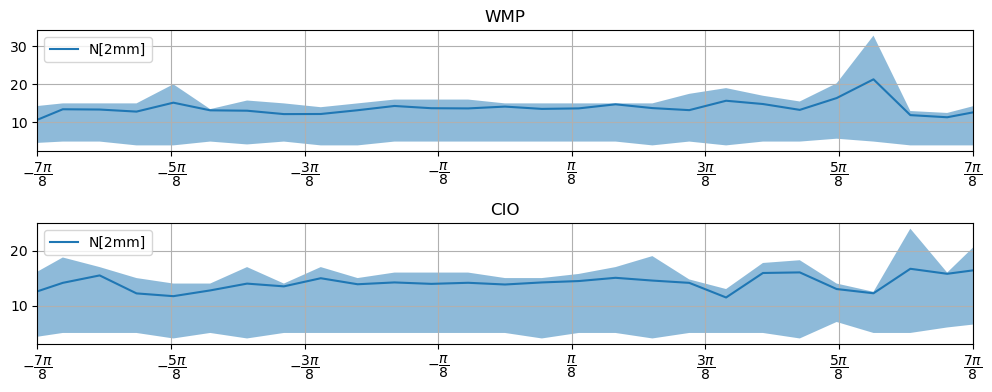

In [109]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,4))
regions = [wmp_region(), cio_region()]
for i, region in enumerate(regions):
   
    pc = load_pf_pc_database(region.name, 5)
    alpha_c = pc.pc1#/load_era5_pcs(region.name).sel(mode=1).std().item()
    alpha_s = pc.pc2#/load_era5_pcs(region.name).sel(mode=2).std().item()
    theta = np.arctan2(alpha_s, alpha_c)
    theta_bins = np.linspace(-np.pi, np.pi, 30)

    df = load_pf_crh(region.name, 5)
    df = df[(df['num_10mmhr_pixels']>0) & (df['total_precip']>df['total_precip'].quantile(0.75))]
    data_to_bin = df.max_10mmhr_size
    
    binned_data = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).mean()
    upper = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).quantile(0.75)
    lower = data_to_bin.groupby(pd.cut(theta, bins=theta_bins), observed=False).quantile(0.25)
    bin_centers = (theta_bins[:-1] + theta_bins[1:])/2
    ax = axs[np.unravel_index(i, axs.shape)]
    ax.plot(bin_centers, binned_data, label='N[2mm]')
    ax.fill_between(bin_centers, lower, upper, alpha=0.5)

    
    ax.set_title(region.name)
    ax.legend()


    # Set x-axis ticks and labels
    tick_positions = np.arange(-7*np.pi/8, 7*np.pi/8 + np.pi/8, np.pi/4)
    tick_labels = [r'$-\dfrac{7\pi}{8}$',
                r'$-\dfrac{5\pi}{8}$',
                r'$-\dfrac{3\pi}{8}$',
                r'$-\dfrac{\pi}{8}$',
                r'$\dfrac{\pi}{8}$',
                r'$\dfrac{3\pi}{8}$',
                r'$\dfrac{5\pi}{8}$',
                r'$\dfrac{7\pi}{8}$']
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_xlim(-7*np.pi/8, 7*np.pi/8)
    ax.grid()


fig.tight_layout(pad=1)

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_35470/3302786331.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_pr = pr.groupby(pd.cut(crh, bins)).mean()


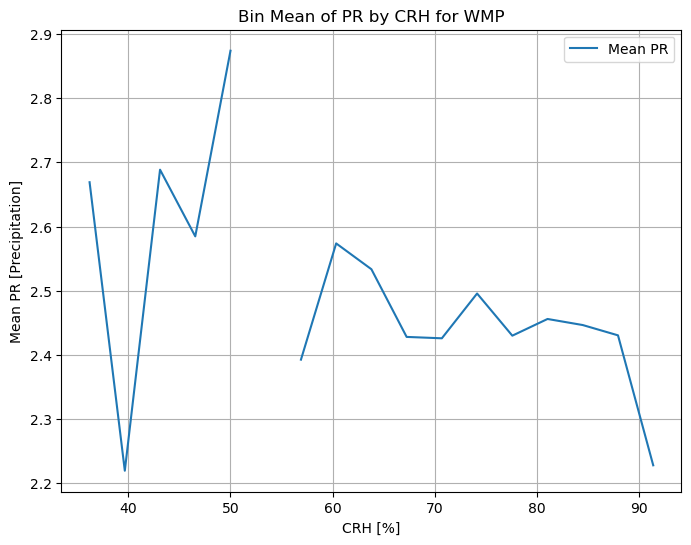

In [102]:
# Define the region and load the data
region = wmp_region()
df = load_pf_crh(region.name, 5)

# Extract the CRH and PR values
crh = df.crh
pr = df.total_precip / df.num_pixels

# Define the bins for CRH
bins = np.linspace(0, 100, 30)

# Group PR by the binned CRH and calculate the mean of PR for each bin
binned_pr = pr.groupby(pd.cut(crh, bins)).mean()

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot the bin mean of PR by CRH
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, binned_pr, label='Mean PR')
plt.xlabel('CRH [%]')
plt.ylabel('Mean PR [Precipitation]')
plt.title(f'Bin Mean of PR by CRH for {region.name}')
plt.grid(True)
plt.legend()
plt.show()




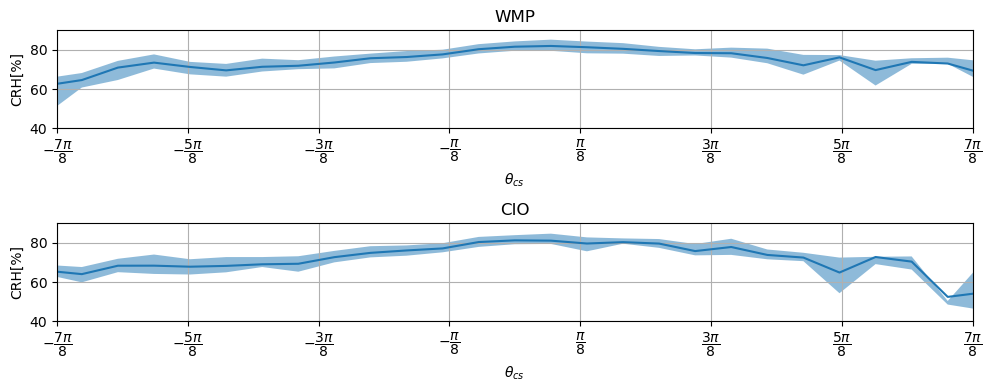

In [79]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,4))
regions = [wmp_region(), cio_region()]
for i, region in enumerate(regions):
   
    df = load_pf_crh(region.name, 5)
    pc = load_pf_pc_database(region.name, 5)
    alpha_c = pc.pc1#/load_era5_pcs(region.name).sel(mode=1).std().item()
    alpha_s = pc.pc2#/load_era5_pcs(region.name).sel(mode=2).std().item()
    theta = np.arctan2(alpha_s, alpha_c)
    theta_bins = np.linspace(-np.pi, np.pi, 30)

    
    binned_crh = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).mean()
    Ncrh = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).count()
    crh_std = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).std()/np.sqrt(Ncrh)
    
    bin_centers = (theta_bins[:-1] + theta_bins[1:])/2
    ax = axs[np.unravel_index(i, axs.shape)]

    ax.plot(bin_centers, binned_crh, label='CRH')
    # ax.fill_between(bin_centers, binned_crh+crh_std, binned_crh-crh_std, alpha=0.5)
    upper = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).quantile(0.75)
    lower = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).quantile(0.25)
    ax.fill_between(bin_centers, upper, lower, alpha=0.5)
    ax.set_title(region.name)
    ax.set_xlabel(r'$\theta_{cs}$')
    ax.set_ylabel('CRH[%]')
    ax.set_ylim(40, 90)
    ax.grid()

        # Set x-axis ticks and labels
    tick_positions = np.arange(-7*np.pi/8, 7*np.pi/8 + np.pi/8, np.pi/4)
    tick_labels = [r'$-\dfrac{7\pi}{8}$',
                r'$-\dfrac{5\pi}{8}$',
                r'$-\dfrac{3\pi}{8}$',
                r'$-\dfrac{\pi}{8}$',
                r'$\dfrac{\pi}{8}$',
                r'$\dfrac{3\pi}{8}$',
                r'$\dfrac{5\pi}{8}$',
                r'$\dfrac{7\pi}{8}$']
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_xlim(-7*np.pi/8, 7*np.pi/8)


fig.tight_layout(pad=1)


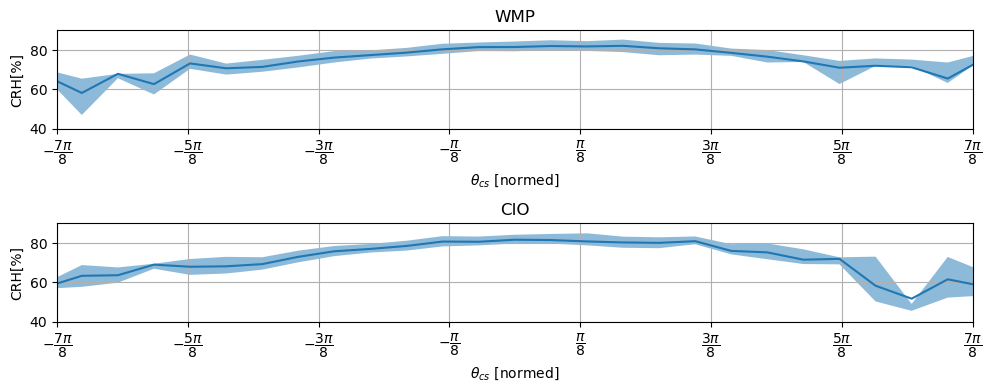

In [84]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,4))
regions = [wmp_region(), cio_region()]
for i, region in enumerate(regions):
   
    df = load_pf_crh(region.name, 5)
    pc = load_pf_pc_database(region.name, 5)
    alpha_c = pc.pc1/load_era5_pcs(region.name).sel(mode=1).std().item()
    alpha_s = pc.pc2/load_era5_pcs(region.name).sel(mode=2).std().item()
    theta = np.arctan2(alpha_s, alpha_c)
    theta_bins = np.linspace(-np.pi, np.pi, 30)

    
    binned_crh = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).mean()
    Ncrh = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).count()
    crh_std = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).std()/np.sqrt(Ncrh)
    
    bin_centers = (theta_bins[:-1] + theta_bins[1:])/2
    ax = axs[np.unravel_index(i, axs.shape)]

    ax.plot(bin_centers, binned_crh, label='CRH')
    # ax.fill_between(bin_centers, binned_crh+crh_std, binned_crh-crh_std, alpha=0.5)
    upper = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).quantile(0.75)
    lower = df.crh.groupby(pd.cut(theta, bins=theta_bins), observed=False).quantile(0.25)
    ax.fill_between(bin_centers, upper, lower, alpha=0.5)
    ax.set_title(region.name)
    ax.set_xlabel(r'$\theta_{cs}$ [normed]')
    ax.set_ylabel('CRH[%]')
    ax.set_ylim(40, 90)
    ax.grid()

        # Set x-axis ticks and labels
    tick_positions = np.arange(-7*np.pi/8, 7*np.pi/8 + np.pi/8, np.pi/4)
    tick_labels = [r'$-\dfrac{7\pi}{8}$',
                r'$-\dfrac{5\pi}{8}$',
                r'$-\dfrac{3\pi}{8}$',
                r'$-\dfrac{\pi}{8}$',
                r'$\dfrac{\pi}{8}$',
                r'$\dfrac{3\pi}{8}$',
                r'$\dfrac{5\pi}{8}$',
                r'$\dfrac{7\pi}{8}$']
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_xlim(-7*np.pi/8, 7*np.pi/8)


fig.tight_layout(pad=1)


In [60]:
load_pf_crh(region.name, 5)

,Unnamed: 0,pf_filename,observation_time,mean_latitude,mean_longitude,precipitation_centroid_latitude,precipitation_centroid_longitude,num_pixels,num_conv_pixels,num_strat_pixels,...,max_2mmhr_size,num_5mmhr_pixels,max_5mmhr_size,num_10mmhr_pixels,max_10mmhr_size,total_precip,total_conv_precip,total_strat_precip,max_precip,crh
0,0,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150801_14:22:15,-0.298781,105.206100,-0.306830,105.199658,41.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,13.222820,0.000000,12.479753,1.751050,77.495022
1,5,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150804_11:48:22,-8.723530,135.191910,-8.718983,135.159673,68.0,68.0,0.0,...,7.0,7.0,2.0,1.0,1.0,150.562010,150.562010,0.000000,11.384421,76.647212
2,11,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150807_23:50:32,-6.295283,112.052826,-6.284766,112.011635,53.0,40.0,13.0,...,27.0,22.0,10.0,12.0,3.0,311.083856,252.262615,58.821241,32.879074,77.575677
3,23,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150819_21:17:34,5.772151,105.158226,5.815785,105.168703,79.0,56.0,21.0,...,43.0,33.0,31.0,17.0,5.0,510.773902,448.895081,61.513402,34.867104,72.913896
4,26,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150823_03:07:01,4.774845,177.420486,4.820496,177.448214,161.0,83.0,77.0,...,14.0,17.0,3.0,10.0,3.0,335.416993,233.622671,101.643607,15.187871,75.981895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62080,2178,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_28...,20201222_11:11:47,9.665322,148.021774,9.695586,148.015276,62.0,44.0,18.0,...,9.0,8.0,2.0,2.0,1.0,146.765439,119.591517,27.173922,16.954823,69.164856
62081,2179,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_28...,20201219_12:13:11,5.910000,148.279999,5.912161,148.252048,45.0,33.0,12.0,...,16.0,13.0,11.0,4.0,2.0,227.012214,203.378261,23.633953,56.905506,79.299572
62082,2180,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_29...,20201215_14:06:34,8.709523,135.210709,8.724554,135.221889,42.0,30.0,12.0,...,4.0,1.0,1.0,0.0,0.0,69.382962,51.940311,17.442651,6.413221,75.619911
62083,2181,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_30...,20201231_19:32:39,7.433914,166.927383,7.361085,166.969989,115.0,87.0,28.0,...,18.0,15.0,3.0,3.0,1.0,301.965344,250.511032,51.454312,33.474358,80.871748


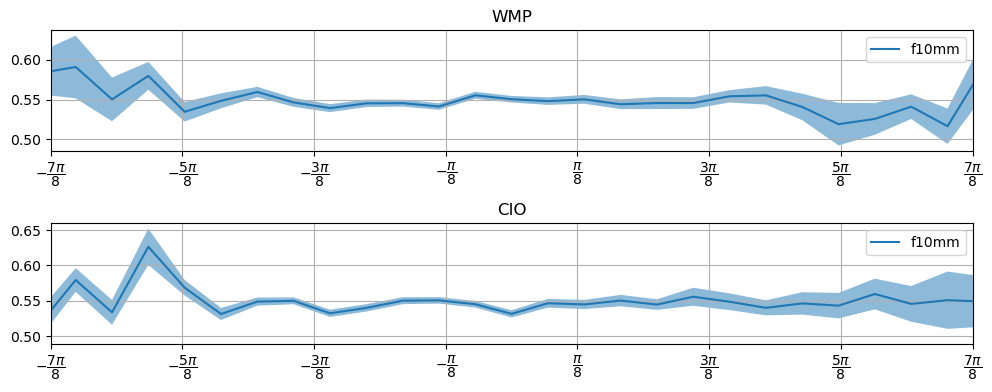

NameError: name 'pc_ds' is not defined

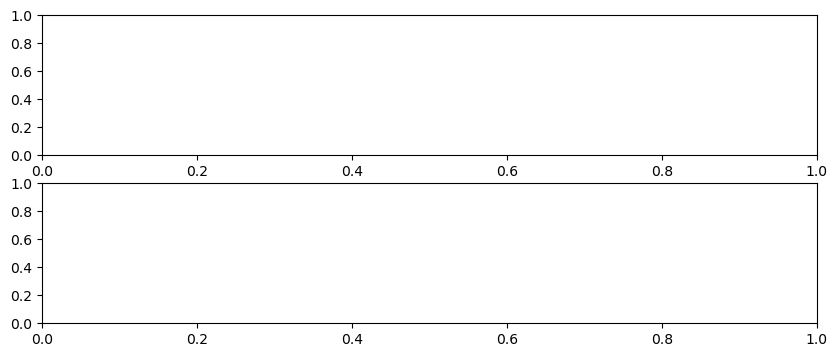

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,4))
regions = [wmp_region(), cio_region()]

for i, region in enumerate(regions):
    ax = axs[np.unravel_index(i, axs.shape)]
    pf_ds = load_pf_pc_database(region.name, 5)
    alpha_c = pf_ds.pc1/pf_ds.pc1.std()
    alpha_s = pf_ds.pc2/pf_ds.pc2.std()
    theta = np.arctan2(alpha_s, alpha_c)
    theta_bins = np.linspace(-np.pi, np.pi, 30)
    crf = pc_ds.total_conv_precip/pc_ds.total_precip
    srf = pc_ds.total_strat_precip/pc_ds.total_precip
    binned_crf = crf.groupby(pd.cut(theta, bins=theta_bins)).mean()
    Ncrf = crf.groupby(pd.cut(theta, bins=theta_bins)).count()
    crf_std = crf.groupby(pd.cut(theta, bins=theta_bins)).std()/np.sqrt(Ncrh)

    binned_srf = srf.groupby(pd.cut(theta, bins=theta_bins)).mean()
    Nsrf = srf.groupby(pd.cut(theta, bins=theta_bins)).count()
    srf_std = srf.groupby(pd.cut(theta, bins=theta_bins)).std()/np.sqrt(Nsrf)
    bin_centers = (theta_bins[:-1] + theta_bins[1:])/2

    ax.plot(bin_centers, binned_crf, label='CRF')
    ax.fill_between(bin_centers, binned_crf+crf_std, binned_crf-crf_std, alpha=0.5)
    ax.plot(bin_centers, binned_srf, label='SRF')
    ax.fill_between(bin_centers, binned_srf+srf_std, binned_srf-srf_std, alpha=0.5)

    ax.legend()
    ax.set_title(region.name)
    ax.set_ylim(0.4, 0.6)
    ax.set_ylabel('Rain Fraction')
    ax.set_xlabel(r'$\theta_{cs}$')
fig.tight_layout(pad=1)

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_30558/597920213.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_crf = crf.groupby(pd.cut(theta, bins=theta_bins)).mean()
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_30558/597920213.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Ncrf = crf.groupby(pd.cut(theta, bins=theta_bins)).count()
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_30558/597920213.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current

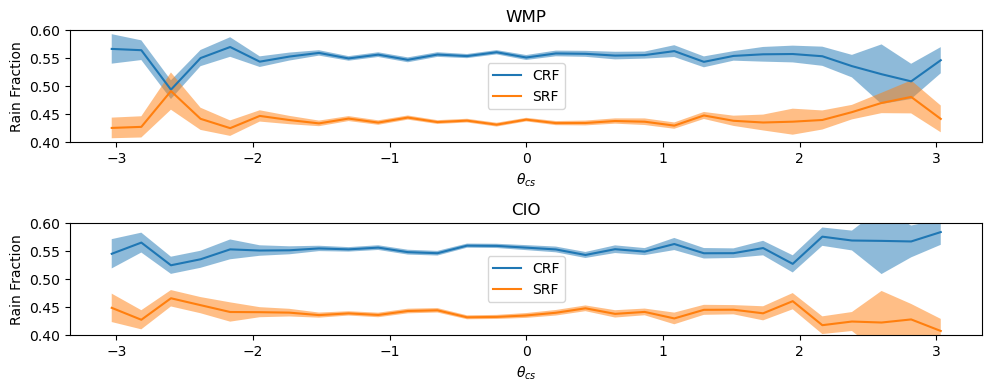

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,4))
regions = [wmp_region(), cio_region()]

for i, region in enumerate(regions):
    ax = axs[np.unravel_index(i, axs.shape)]
    pf_ds = load_pf_pf_database(region.name, 5)
    alpha_c = pf_ds.pc1/pf_ds.pc1.std()
    alpha_s = pf_ds.pc2/pf_ds.pc2.std()
    theta = np.arctan2(alpha_s, alpha_c)
    theta_bins = np.linspace(-np.pi, np.pi, 30)
    crf = pc_ds.total_conv_precip/pc_ds.total_precip
    srf = pc_ds.total_strat_precip/pc_ds.total_precip
    binned_crf = crf.groupby(pd.cut(theta, bins=theta_bins)).mean()
    Ncrf = crf.groupby(pd.cut(theta, bins=theta_bins)).count()
    crf_std = crf.groupby(pd.cut(theta, bins=theta_bins)).std()/np.sqrt(Ncrh)

    binned_srf = srf.groupby(pd.cut(theta, bins=theta_bins)).mean()
    Nsrf = srf.groupby(pd.cut(theta, bins=theta_bins)).count()
    srf_std = srf.groupby(pd.cut(theta, bins=theta_bins)).std()/np.sqrt(Nsrf)
    bin_centers = (theta_bins[:-1] + theta_bins[1:])/2

    ax.plot(bin_centers, binned_crf, label='CRF')
    ax.fill_between(bin_centers, binned_crf+crf_std, binned_crf-crf_std, alpha=0.5)
    ax.plot(bin_centers, binned_srf, label='SRF')
    ax.fill_between(bin_centers, binned_srf+srf_std, binned_srf-srf_std, alpha=0.5)

    ax.legend()
    ax.set_title(region.name)
    ax.set_ylim(0.4, 0.6)
    ax.set_ylabel('Rain Fraction')
    ax.set_xlabel(r'$\theta_{cs}$')
fig.tight_layout(pad=1)